In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
dfcard = pd.read_csv("C:\\Users\\utkar\\Downloads\\creditcard.csv")

In [4]:
dfcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## DATA WRANGLING

In [5]:
dfcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dfcard.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
dfcard.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110399,71811.0,-0.451626,0.790366,0.838616,-1.691492,0.621394,-0.236221,0.777264,-0.096716,0.136183,...,-0.182994,-0.260113,-0.249091,-0.806292,-0.065351,0.798658,0.123554,-0.099602,0.77,0
43371,41479.0,-1.162608,-0.223664,1.132866,-1.128380,-0.497484,-0.338901,-0.255488,0.479746,-1.146498,...,0.083291,-0.179257,-0.209054,-0.453689,0.589125,-0.160056,-0.095237,-0.078154,73.00,0
238023,149493.0,-1.064407,0.677792,1.371673,0.269541,0.601436,0.304308,0.454620,0.259099,0.355904,...,-0.464577,-1.134631,-0.057864,-0.561577,-0.194672,-1.105753,0.142825,0.255800,17.82,0
55673,47063.0,-0.662977,1.563024,0.378821,1.543844,0.960815,0.603138,0.500628,0.525881,-1.373695,...,0.010288,-0.212707,-0.276686,-1.355914,0.271726,0.074636,-0.253507,-0.062424,2.35,0
264341,161380.0,0.067290,0.957188,-0.664328,-1.247445,1.383690,-1.249239,1.792893,-0.539221,-0.426163,...,0.217863,0.971802,-0.343936,-0.293124,-0.339669,0.061562,0.226173,0.031053,0.77,0


In [8]:
dfcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
dfcard.shape

(284807, 31)

In [10]:
dfcard.size

8829017

In [11]:
dfcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## DATA CLEANING

**FINDING DUPLICATE VALUES AND NULL RECORDS**

In [12]:
dfcard.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

**This function only returned the top 5 rows and the bottom 5 rows its has not give the neccessary information required to the direct duplicate values in a dataset**

In [13]:
dfcard[dfcard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [14]:
dfcard.duplicated().sum()

1081

In [15]:
dfcard = dfcard.drop_duplicates()

In [16]:
dfcard[dfcard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**after using the drop function, all the diplicated records got deleted from the data**

## FINDING THE NULL VALUES

In [17]:
dfcard.isnull()   # Using isnull function will return the series of a boolean values the comfirm null areas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
dfcard.isnull().sum()  # This will generate total null values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

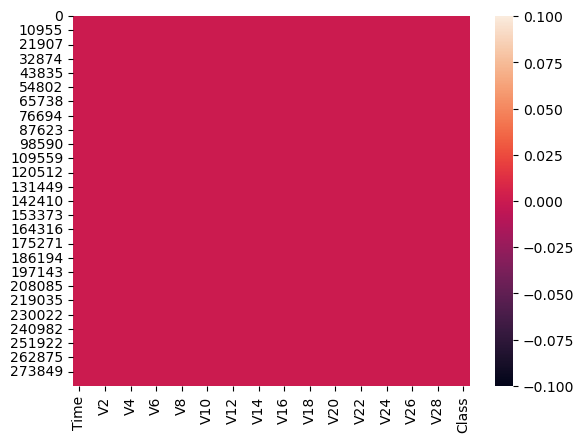

In [19]:
sns.heatmap(dfcard.isnull())

In [20]:
dfcard["Amount"].value_counts()

1.00      13566
1.98       6044
0.89       4871
9.99       4738
15.00      3280
          ...  
526.60        1
248.16        1
492.65        1
811.50        1
95.63         1
Name: Amount, Length: 32767, dtype: int64

In [21]:
dfcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


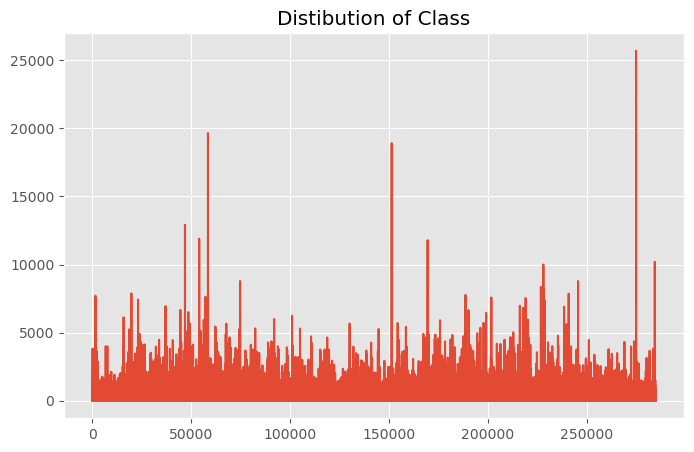

In [22]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    plt.plot(dfcard["Amount"])
    plt.show()

In [23]:
dfcard["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

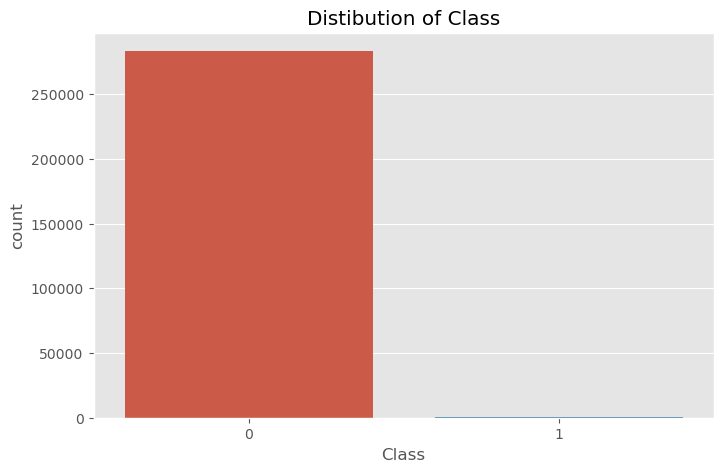

In [24]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=dfcard,x=dfcard["Class"])
    plt.show()

**what is the precentage of fraud transactions ?**

In [25]:
fraud_per=round((len(dfcard[dfcard.Class==1])/len(dfcard[dfcard.Class==0]))*100,2)
print(f"The percentage of fraud transactions is {fraud_per} %")

The percentage of fraud transactions is 0.17 %


**This Data is higly unbalanced**

In [26]:
#0 --> Normal Transaction
#1 --> Fraudulent Transaction

In [27]:
# Seperating the data for analysis
legit = dfcard[dfcard.Class == 0]
fraud = dfcard[dfcard.Class == 1]

In [28]:
print(legit.shape)

(283253, 31)


In [29]:
print(fraud.shape)

(473, 31)


In [30]:
# Statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
#compare the values for both transaction
dfcard.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


- BUILD A SAMPLE DATASET CONTAINING SIMILAR DISTRIBUTION OF NORMAL TRANSACTIONS AND FRAUDULENT TRANSACTIONS

- NUMBER OF FRAUDULENT TRANSACTION --> 473

In [33]:
LEGIT_SAMPLE = legit.sample(n= 473)

In [34]:
#CONCATINATING TWO DATASET

In [35]:
dfCredit_card = pd.concat([LEGIT_SAMPLE, fraud], axis=0)

In [36]:
dfCredit_card 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19131,30039.0,-6.155507,5.042451,-0.838338,-1.382925,-0.545593,-0.497450,1.143606,-0.435331,5.173414,...,-0.969749,-0.298099,0.050918,0.042050,1.108418,0.338426,2.117204,1.305758,9.25,0
119418,75438.0,1.077810,0.079241,1.141055,1.217431,-0.846259,-0.465194,-0.332025,0.064654,0.337000,...,0.014286,0.034617,0.137914,0.569137,0.161285,-0.516331,0.061149,0.042235,25.59,0
132686,80079.0,1.046694,-0.580671,1.020624,0.334667,-1.296821,-0.485596,-0.577125,0.010883,0.935569,...,0.123974,0.294754,-0.105250,0.488087,0.170958,1.099299,-0.054519,0.030746,99.00,0
117870,74848.0,-4.461458,2.316488,-0.232874,3.429883,-3.462797,0.777651,-2.056009,3.101082,-1.525527,...,0.152215,-0.197751,0.129046,0.554845,0.094224,0.124759,-1.084340,-0.611713,102.15,0
191171,129145.0,-0.665015,0.802685,1.340358,-1.499148,0.695621,0.526593,0.776066,-0.440720,1.253782,...,-0.295603,-0.391037,-0.147988,0.179184,-0.213779,-0.408554,-0.675150,-0.543874,0.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [37]:
dfCredit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19131,30039.0,-6.155507,5.042451,-0.838338,-1.382925,-0.545593,-0.497450,1.143606,-0.435331,5.173414,...,-0.969749,-0.298099,0.050918,0.042050,1.108418,0.338426,2.117204,1.305758,9.25,0
119418,75438.0,1.077810,0.079241,1.141055,1.217431,-0.846259,-0.465194,-0.332025,0.064654,0.337000,...,0.014286,0.034617,0.137914,0.569137,0.161285,-0.516331,0.061149,0.042235,25.59,0
132686,80079.0,1.046694,-0.580671,1.020624,0.334667,-1.296821,-0.485596,-0.577125,0.010883,0.935569,...,0.123974,0.294754,-0.105250,0.488087,0.170958,1.099299,-0.054519,0.030746,99.00,0
117870,74848.0,-4.461458,2.316488,-0.232874,3.429883,-3.462797,0.777651,-2.056009,3.101082,-1.525527,...,0.152215,-0.197751,0.129046,0.554845,0.094224,0.124759,-1.084340,-0.611713,102.15,0
191171,129145.0,-0.665015,0.802685,1.340358,-1.499148,0.695621,0.526593,0.776066,-0.440720,1.253782,...,-0.295603,-0.391037,-0.147988,0.179184,-0.213779,-0.408554,-0.675150,-0.543874,0.77,0


In [38]:
dfCredit_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [39]:
dfCredit_card["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [40]:
dfCredit_card.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97410.202960,-0.156639,-0.156287,0.018934,0.112994,0.055905,0.053697,0.012294,0.024939,0.098991,...,-0.052395,-0.017672,-0.033628,-0.057492,-0.025371,-0.052248,-0.040401,-0.018155,0.006399,90.814165
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## SPLITTING THE DATA INTO FEATURES AND TARGETS

In [41]:
x = dfCredit_card.drop(columns = "Class", axis = 1)
y = dfCredit_card["Class"]

In [42]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
19131,30039.0,-6.155507,5.042451,-0.838338,-1.382925,-0.545593,-0.497450,1.143606,-0.435331,5.173414,...,3.380647,-0.969749,-0.298099,0.050918,0.042050,1.108418,0.338426,2.117204,1.305758,9.25
119418,75438.0,1.077810,0.079241,1.141055,1.217431,-0.846259,-0.465194,-0.332025,0.064654,0.337000,...,-0.147146,0.014286,0.034617,0.137914,0.569137,0.161285,-0.516331,0.061149,0.042235,25.59
132686,80079.0,1.046694,-0.580671,1.020624,0.334667,-1.296821,-0.485596,-0.577125,0.010883,0.935569,...,0.110049,0.123974,0.294754,-0.105250,0.488087,0.170958,1.099299,-0.054519,0.030746,99.00
117870,74848.0,-4.461458,2.316488,-0.232874,3.429883,-3.462797,0.777651,-2.056009,3.101082,-1.525527,...,-0.876262,0.152215,-0.197751,0.129046,0.554845,0.094224,0.124759,-1.084340,-0.611713,102.15
191171,129145.0,-0.665015,0.802685,1.340358,-1.499148,0.695621,0.526593,0.776066,-0.440720,1.253782,...,0.351538,-0.295603,-0.391037,-0.147988,0.179184,-0.213779,-0.408554,-0.675150,-0.543874,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [43]:
y

19131     0
119418    0
132686    0
117870    0
191171    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

## SPLTTING THE DATA INTO TRAINING AND TESTING DATA

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(946, 30) (756, 30) (190, 30)


In [46]:
print(y.shape, y_train.shape, y_test.shape)

(946,) (756,) (190,)


## MODEL TRAINING

In [47]:
model_lr = LogisticRegression()

In [48]:
model_lr.fit(x_train, y_train)

LogisticRegression()

**MODEL EVALUATION*

In [49]:
y_pred = model_lr.predict(x_test)
Accuracy_Score = accuracy_score(y_pred, y_test)

In [50]:
Accuracy_Score

0.9315789473684211

In [51]:
print(f"The accuracy of the model is {round(model_lr.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 93.16%


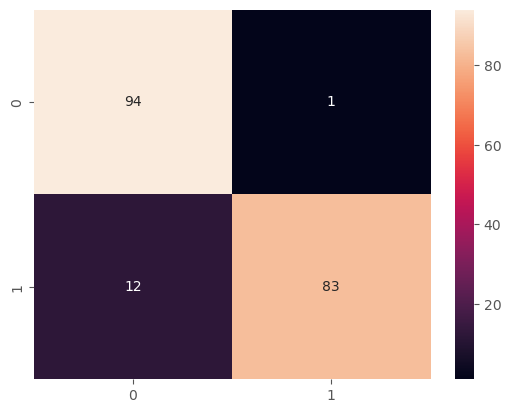

In [52]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**RANDOM FOREST CLASSIFIER**

In [53]:
model_rfc = RandomForestClassifier()

In [54]:
model_rfc.fit(x_train, y_train)

RandomForestClassifier()

**MODEL EVALUATION*

In [55]:
y_pred_random = model_rfc.predict(x_test)
Accuracy_Score = accuracy_score(y_pred_random, y_test)

In [56]:
Accuracy_Score

0.9368421052631579

In [86]:
print(f"The accuracy of the model is {round(model_rfc.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 93.68%


**XGBOOST MODEL**

In [87]:
from xgboost import XGBClassifier

In [88]:
model_xgb=XGBClassifier(max_depth=2)

In [89]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**MODEL EVALUATION**

In [94]:
y_pred_xgboost = model_xgb.predict(x_test)
Accuracy_Score_xgb = accuracy_score(y_pred_xgboost, y_test)

In [95]:
Accuracy_Score_xgb

0.9473684210526315

In [96]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 94.74%
